In [117]:
import pandas as pd
import numpy as np
import yfinance as yf

In [118]:
df=yf.download('MSFT',start='2022-01-01',end='2022-11-22')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,338.510010,339.359985,335.850006,336.320007,330.269440,18000800
2022-01-03,335.350006,338.000000,329.779999,334.750000,328.727661,28865100
2022-01-04,334.829987,335.200012,326.119995,329.010010,323.090912,32674300
2022-01-05,325.859985,326.070007,315.980011,316.380005,310.688171,40054300
2022-01-06,313.149994,318.700012,311.489990,313.880005,308.233093,39646100
...,...,...,...,...,...,...
2022-11-15,245.660004,247.000000,240.029999,241.970001,239.169312,31390100
2022-11-16,242.789993,243.800003,240.419998,241.729996,239.605438,24093300
2022-11-17,237.779999,243.250000,237.630005,241.679993,239.555878,23123500


In [125]:
def donchian_breakout(df:pd.DataFrame, lookback: int):
    #input df is assumed to have a 'close' column
    df['upper']=df['Close'].rolling(lookback-1).max().shift(1)
    df['lower']=df['Close'].rolling(lookback-1).min().shift(1)
    df['Signal']=np.nan
    df.loc[df['Close']>df['upper'],'Signal']=1
    df.loc[df['Close']<df['lower'],'Signal']=-1
    #df['Signal']=df['Signal'].ffill()

In [126]:
donchian_breakout(df,30)

In [127]:
df

,Open,High,Low,Close,Adj Close,Volume,upper,lower,Signal
Date,,,,,,,,,
2021-12-31,338.510010,339.359985,335.850006,336.320007,330.269440,18000800,NaN,NaN,NaN
2022-01-03,335.350006,338.000000,329.779999,334.750000,328.727661,28865100,NaN,NaN,NaN
2022-01-04,334.829987,335.200012,326.119995,329.010010,323.090912,32674300,NaN,NaN,NaN
2022-01-05,325.859985,326.070007,315.980011,316.380005,310.688171,40054300,NaN,NaN,NaN
2022-01-06,313.149994,318.700012,311.489990,313.880005,308.233093,39646100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-11-15,245.660004,247.000000,240.029999,241.970001,239.169312,31390100,250.660004,214.25,NaN
2022-11-16,242.789993,243.800003,240.419998,241.729996,239.605438,24093300,250.660004,214.25,NaN
2022-11-17,237.779999,243.250000,237.630005,241.679993,239.555878,23123500,250.660004,214.25,NaN


In [128]:
import matplotlib.pyplot as plt

In [129]:
df[df['Signal']==1]['Close']

Date
2022-03-22    304.059998
2022-03-24    304.100006
2022-03-28    310.700012
2022-03-29    315.410004
2022-07-27    268.739990
2022-07-28    276.410004
2022-07-29    280.739990
2022-08-03    282.470001
2022-08-04    283.649994
2022-08-10    289.160004
2022-08-12    291.910004
2022-08-15    293.470001
2022-10-25    250.660004
Name: Close, dtype: float64

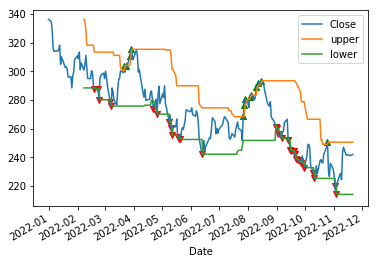

In [130]:
df[['Close','upper','lower']].plot()
plt.scatter(np.array(df[df['Signal']==1].index),df[df['Signal']==1]['Close'],marker='^',color='g')
plt.scatter(np.array(df[df['Signal']==-1].index),df[df['Signal']==-1]['Close'],marker='v',color='r')